# 最終課題

In [1]:
start_url = "https://www.musashino-u.ac.jp/"


In [2]:
{
    "https://www.musashino-u.ac.jp/": "武蔵野大学｜Musashino University",
    "https://www.musashino-u.ac.jp/about/": "About Musashino University",
    
}


{'https://www.musashino-u.ac.jp/': '武蔵野大学｜Musashino University',
 'https://www.musashino-u.ac.jp/about/': 'About Musashino University'}

# Imports

In [3]:
import requests
from bs4 import BeautifulSoup
import time


 # Helper function for getting links (Code):

In [4]:
def get_links(url, domain):
    """Return all same-domain links from a given page."""
    try:
        res = requests.get(url)
        res.encoding = res.apparent_encoding
        soup = BeautifulSoup(res.text, "html.parser")
        links = []
        for a in soup.find_all("a", href=True):
            link = a["href"]
            if link.startswith("http") and domain in link:
                links.append(link)
            elif link.startswith("/"):
                links.append("https://www.musashino-u.ac.jp" + link)
        return links
    except Exception as e:
        print("Error:", e)
        return []


# Crawler function

In [11]:
start_url = "https://www.musashino-u.ac.jp/"
domain = "musashino-u.ac.jp"

visited = set()
site_map = {}

def crawl(url):
    if url in visited:
        return
    visited.add(url)
    print("Visiting:", url)
    
    try:
        res = requests.get(url)
        res.encoding = res.apparent_encoding
        soup = BeautifulSoup(res.text, "html.parser")
        title = soup.title.string if soup.title else "No title"
        site_map[url] = title
    except Exception as e:
        print("Error accessing", url, ":", e)
        return
    
    time.sleep(1)  # wait 1 second
    
    for link in get_links(url, domain):
        if link not in visited:
            crawl(link)


In [16]:
crawl(start_url)
print("\n--- Sitemap ---")
for k, v in site_map.items():
    print(k, ":", v)



--- Sitemap ---
https://www.musashino-u.ac.jp/ : 武蔵野大学
https://ef.musashino-u.ac.jp/donation/ : ご寄付のお願い | 学校法人武蔵野大学
https://www.musashino-u.ac.jp/about/ : 404 Page not found | 武蔵野大学
https://www.musashino-u.ac.jp/access.html : 交通アクセス | 武蔵野大学
https://www.musashino-u.ac.jp/admission/request.html : 資料請求 | 入試情報 | 武蔵野大学
https://www.musashino-u.ac.jp/contact.html : お問い合わせ | 武蔵野大学
https://www.musashino-u.ac.jp/prospective-students.html : 武蔵野大学で学びたい方 | 武蔵野大学
https://www.musashino-u.ac.jp/students.html : 在学生の方 | 武蔵野大学
https://www.musashino-u.ac.jp/alumni.html : 卒業生の方 | 武蔵野大学
https://www.musashino-u.ac.jp/parents.html : 保護者の方 | 武蔵野大学
https://www.musashino-u.ac.jp/business.html : 企業・研究者の方 | 武蔵野大学
https://www.musashino-u.ac.jp/guide/ : 大学案内 | 武蔵野大学
https://www.musashino-u.ac.jp/guide/profile/ : 大学紹介 | 大学案内 | 武蔵野大学
https://www.musashino-u.ac.jp/guide/activities/ : 大学の取り組み | 大学案内 | 武蔵野大学
https://www.musashino-u.ac.jp/guide/campus/ : キャンパス | 大学案内 | 武蔵野大学
https://www.musashino-u.ac.jp/guide/facility/ 

In [9]:
import pandas as pd

data = list(site_map.items())
df = pd.DataFrame(data, columns=["URL", "Title"])
df.to_csv("musashino_sitemap.csv", index=False, encoding="utf-8-sig")

print("✅ Saved as musashino_sitemap.csv")


✅ Saved as musashino_sitemap.csv


# analyze or visualize what I found

In [13]:
print("Total pages collected:", len(site_map))


Total pages collected: 137


In [14]:
import pandas as pd
df = pd.read_csv("musashino_sitemap.csv")
df.head(10)


,URL,Title
0,https://www.musashino-u.ac.jp/,武蔵野大学
1,https://ef.musashino-u.ac.jp/donation/,ご寄付のお願い | 学校法人武蔵野大学
2,https://www.musashino-u.ac.jp/about/,404 Page not found | 武蔵野大学
3,https://www.musashino-u.ac.jp/access.html,交通アクセス | 武蔵野大学
4,https://www.musashino-u.ac.jp/admission/reques...,資料請求 | 入試情報 | 武蔵野大学
5,https://www.musashino-u.ac.jp/contact.html,お問い合わせ | 武蔵野大学
6,https://www.musashino-u.ac.jp/prospective-stud...,武蔵野大学で学びたい方 | 武蔵野大学
7,https://www.musashino-u.ac.jp/students.html,在学生の方 | 武蔵野大学
8,https://www.musashino-u.ac.jp/alumni.html,卒業生の方 | 武蔵野大学
9,https://www.musashino-u.ac.jp/parents.html,保護者の方 | 武蔵野大学


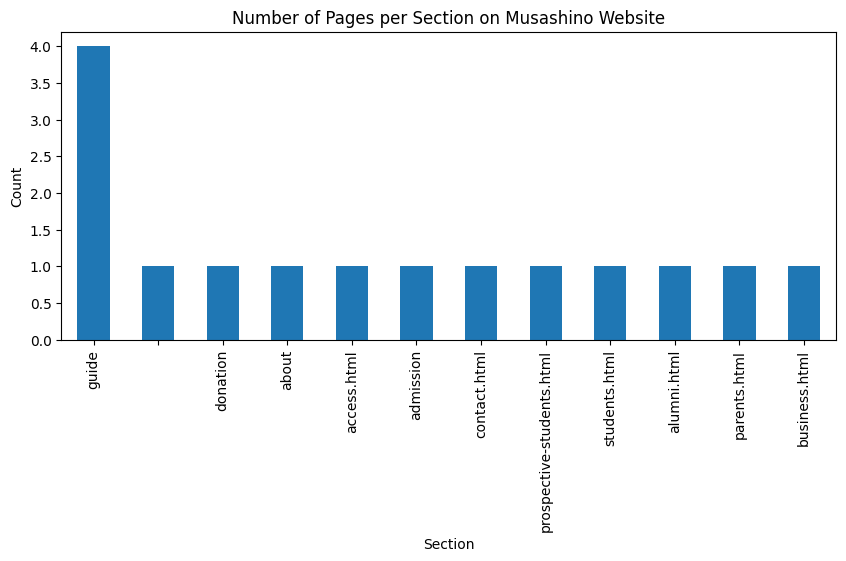

In [15]:
import matplotlib.pyplot as plt

df['Section'] = df['URL'].apply(lambda x: x.split('/')[3] if len(x.split('/')) > 3 else 'root')
df['Section'].value_counts().plot(kind='bar', figsize=(10,4))
plt.title("Number of Pages per Section on Musashino Website")
plt.xlabel("Section")
plt.ylabel("Count")
plt.show()


# まとめ
この課題では、Pythonを使ってシンプルなウェブクローラーを作りました。
クローラーは武蔵野大学の公式ウェブサイトのページを自動で訪問し、URLとページタイトルを集めました。
集めたデータは musashino_sitemap.csv というファイルに保存しました。
このデータから、「大学案内」「学生」「入試」などのページ構成がわかりました。
この課題を通して、Requests、BeautifulSoup、Pandas などのPythonライブラリを使ったデータ収集と分析の方法を学びました。